In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
# Replace 'BNB-USD.csv' with your dataset file
data = pd.read_csv('data/blockchain-kinesis-data-stream-realtime.csv')

# Step 3: Data Exploration
print(data.head())  # Display the first 5 rows
print(data.info())  # Check for missing values and data types

# Step 4: Preprocess the Data
# Convert the Date column to datetime format if present
# data['Date'] = pd.to_datetime(data['Date'])

# Create a target column: Price_Change (1 for increase, 0 for decrease)
data['tokenTrusted'] = (data['closingValue'] > data['openingValue']).astype(int)

# Select features (X) and target (y)
X = data[['openingValue','closingValue','highestValue','lowestValue','volumeStocks','userFollowers','userFriends','userCreditRating'
]]  # Replace with relevant features from your dataset
y = data['tokenTrusted']  # Target variable

# Handle missing values (if any)
X.fillna(method='ffill', inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
classifier.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = classifier.predict(X_test)

# Step 7: Evaluate the Model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


  currencyId  openingValue  closingValue  highestValue   lowestValue  \
0   16488849  8.038788e+06  6.837129e+06  7.104514e+06  3.402046e+06   
1   c294d6a9  4.846313e+06  8.550841e+06  7.972916e+05  6.705993e+06   
2   0e103d60  2.459046e+06  8.161704e+05  6.731340e+06  6.433721e+06   
3   bcda0a6b  1.259388e+06  9.960730e+06  7.876745e+05  4.898608e+06   
4   afd0388e  6.742674e+06  5.187133e+06  6.272002e+06  2.206014e+06   

       adjClose  volumeStocks                          userIdentity  \
0  4.098355e+06        523637  27632934-5b2b-4ad0-83da-0267ed5cbd86   
1  2.427546e+06        927977  26c6d6eb-d9f0-421f-99cb-34a671060034   
2  4.251601e+06        865215  59072bb8-a83d-4cec-ad9e-64ff1152409e   
3  1.959951e+06        980963  6fcb406a-becd-4018-adc3-2ea152843b49   
4  1.233915e+06        935381  6bc96fa6-b234-4f9e-8e4d-49ab627ffddc   

   userFollowers  userFriends  userVerified  userCreditRating  \
0          62420         2984         False          0.197385   
1         

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure y_test and y_pred are defined
# Example: y_test = actual labels, y_pred = predicted labels from the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print to verify the values
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.925
Precision: 0.95
Recall: 0.9047619047619048
F1 Score: 0.9268292682926829


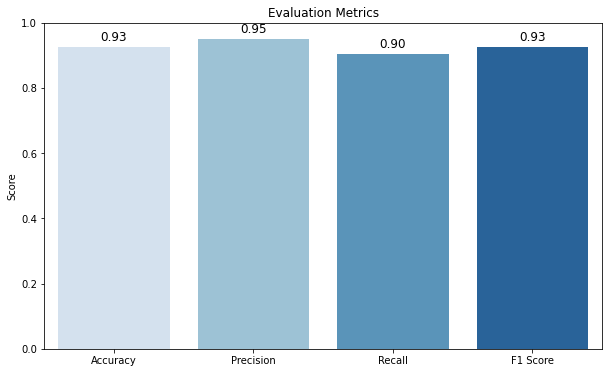

In [4]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='Blues')  # Use a valid palette
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Limit y-axis to valid metric range
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)  # Add value labels above bars
plt.show()
